## Actuated mass on vertical rail

In this notebook, we write the Lagrangian equation of motion for a particle of mass $m$ being moved by an actuator along a vertical rail, and demonstrate their numerical implementation. Let the height of the particle from the ground be $y$, and its first and second derivatives be respectively $v_y$ and $a_y$.

In [1]:
# imports
import numpy as np
import sympy as sp
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import Function

from sympy.vector import *
init_printing(use_unicode=True)

import matplotlib.pyplot as plt  #This is used for static graphs
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3


In [2]:
y, vy, ay, t = symbols('y vy ay t')

m = 2 #mass
g = 98/10 #acceleration due to gravity

y = Function('y')(t) #position
vy = Function('vy')(t) #velocity
ay = Function('ay')(t) #acceleration


T = 1/2*m*vy**2 #kinetic energy
V = m*g*y #potential energy
L = T - V #Lagrangian
L

In the Lagrangian method, we treat the generalized coordinate $y$ and its derivative $vy$ as independent variables. The equation of motion for this system when there is an external non-conservative force $F$, applied by an actuator vertically upwards, is $$\frac{\textrm{d}}{\textrm{d}t}\left(\frac{\partial{L}}{\partial{v_y}}\right) - \frac{\partial{L}}{\partial{y}} = F.$$

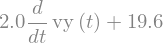

In [3]:
expr0 = diff(diff(L, vy), t) - diff(L, y) #derive the Lagrangian
expr0

In [4]:
expr = expr0.subs(diff(vy, t), ay) #replace derivative of velocity with acceleration 
expr

We can compile this as a numerical function of (in general) $y, vy, ay$:

In [5]:
expr_func = sp.lambdify((y, vy, ay), expr) #numerical implementation of LHS as a fn of y, vy, ay
expr_func

<function _lambdifygenerated(_Dummy_27, _Dummy_28, _Dummy_29)>

Suppose we want the particle to follow a sinusoidal trajectory and (assuming our model of the system is perfect) want to find the values of $F$ to achieve it:

$$y_{desired} = 2 \sin{t}$$

We also wish to plot the motion of the particle from $t=0$ to $t=5$s.

In [6]:
t_vals = np.linspace(0,5,100) #discretize the time interval into 100 instants
t_vals

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [7]:
vy_des, ay_des  = symbols('vy_des ay_des')

y_des = 2*sin(5*t) #desired position
vy_des = diff(y_des, t) #desired velocity
ay_des = diff(vy_des, t) #desired acceleration
vy_des, ay_des

Now we can find the values of position and its derivatives at all these times:

In [8]:
y_func = sp.lambdify(t, y_des)
y_vals = y_func(t_vals) 
y_vals #position values at time instants

array([ 0.        ,  0.49969983,  0.96770328,  1.37432449,  1.69377113,
        1.90578043,  1.99690445,  1.96136314,  1.80141089,  1.52719363,
        1.15610517,  0.71168398,  0.22212008, -0.2815331 , -0.76732838,
       -1.20445138, -1.56517501, -1.82661825, -1.97219755, -1.99267868,
       -1.88676252, -1.6611674 , -1.33020303, -0.91486275, -0.44149195,
        0.05988306,  0.55745964,  1.01967608,  1.4172136 ,  1.72485605,
        1.92308943,  1.99933961,  1.94876998,  1.77458822,  1.48784282,
        1.10672228,  0.65540142,  0.16250788, -0.34069366, -0.82228472,
       -1.25171757, -1.6017529 , -1.85018769, -1.9812635 , -1.98666608,
       -1.86605276, -1.62707412, -1.28488878, -0.86120186, -0.38288818,
        0.11971242,  0.61471957,  1.07073453,  1.45883189,  1.75439431,
        1.938674  ,  1.99998196,  1.93442937,  1.74617427,  1.44715786,
        1.056347  ,  0.59853116,  0.10274997, -0.39954874, -0.87650372,
       -1.29786134, -1.63689451, -1.87209807, -1.98855286, -1.97

In [9]:
vy_func = sp.lambdify(t, vy_des)
vy_vals = vy_func(t_vals) #velocity values at time instants

ay_func = sp.lambdify(t, ay_des)
ay_vals = ay_func(t_vals) #acceleration values at time instants

and we evaluate the numerical function compiled earlier (left hand side of equation of motion), to get the values of force:

In [10]:
F_vals = expr_func(y_vals, vy_vals, ay_vals) #force values at time instants
F_vals

array([ 19.6       ,  -5.38499164, -28.78516404, -49.11622442,
       -65.08855636, -75.68902128, -80.24522269, -78.46815687,
       -70.47054462, -56.75968127, -38.20525851, -15.98419914,
         8.49399619,  33.67665476,  57.96641918,  79.82256906,
        97.85875027, 110.93091251, 118.20987745, 119.23393416,
       113.93812584, 102.65837013,  86.1101515 ,  65.3431375 ,
        41.67459746,  16.60584696,  -8.27298187, -31.3838038 ,
       -51.26067977, -66.64280268, -76.5544714 , -80.36698039,
       -77.83849895, -69.12941081, -54.79214083, -35.7361142 ,
       -13.17007088,  11.47460585,  36.63468323,  60.7142362 ,
        82.18587826,  99.68764494, 112.10938431, 118.66317492,
       118.93330425, 112.90263777, 100.95370577,  83.84443917,
        62.66009325,  38.74440907,  13.61437876, -11.1359785 ,
       -33.93672656, -53.34159461, -68.11971539, -77.33370017,
       -80.39909807, -77.12146828, -67.70871367, -52.75789323,
       -33.21735021, -10.32655782,  14.46250153,  39.57

To check that energy is conserved, we find the rate of change of mechanical energy, first symbolically by differentiating, and then at the time instants chosen for evaluation:

In [11]:
dE = diff(T+V, t).subs([(diff(y, t), vy), (diff(vy, t), ay)]) #differentiate total energy and write in terms of y, vy, ay
dE

In [12]:
dE_func = sp.lambdify((y, vy, ay), dE) #numerical implementation to calculate rate of change of energy as fn of y, vy, ay
dE_vals = dE_func(y_vals, vy_vals, ay_vals)

and show that the external power delivered ($F\cdot v$) is exactly equal to the rate of change of the system's total mechanical energy:

In [13]:
power_vals = F_vals*vy_vals - dE_func(y_vals, vy_vals, ay_vals) #power delivered minus energy increase rate
power_vals

array([ 0.00000000e+00, -1.42108547e-14,  2.84217094e-14, -5.68434189e-14,
        5.68434189e-14,  2.84217094e-14, -7.10542736e-15, -2.84217094e-14,
        5.68434189e-14,  5.68434189e-14,  0.00000000e+00, -2.84217094e-14,
        0.00000000e+00,  5.68434189e-14,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.13686838e-13,  0.00000000e+00, -1.13686838e-13,
       -5.68434189e-14,  0.00000000e+00, -1.42108547e-14,  0.00000000e+00,
       -5.68434189e-14,  5.68434189e-14,  2.84217094e-14, -3.55271368e-15,
        2.84217094e-14,  5.68434189e-14,  5.68434189e-14, -5.68434189e-14,
        1.42108547e-14,  0.00000000e+00,  0.00000000e+00,  1.13686838e-13,
       -1.13686838e-13,  1.13686838e-13,  0.00000000e+00, -2.84217094e-14,
       -2.84217094e-14,  0.00000000e+00,  1.13686838e-13, -1.13686838e-13,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.42108547e-14,
        5.68434189e-14,  

### Plot trajectory of mass

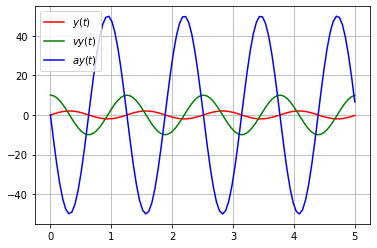

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t_vals,y_vals,'r',label='$y(t)$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.plot(t_vals,vy_vals,'g',label='$vy(t)$')
ax.plot(t_vals,ay_vals,'b',label='$ay(t)$')
ax.legend() #show the legend

plt.show() #this says display the info here

### Plot force profile of actuator

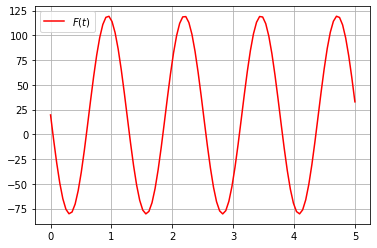

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t_vals,F_vals,'r',label='$F(t)$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend() #show the legend

plt.show() #this says display the info here

### Energy conservation check 

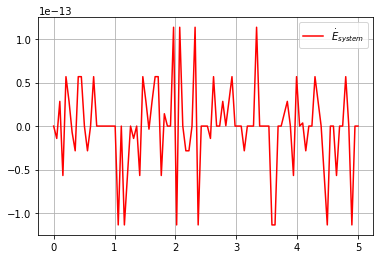

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t_vals,power_vals,'r',label='$\\dot{E}_{system}$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend() #show the legend

plt.show() #this says display the info here

#### Alternative method

In this case, since we know $y$ and its derivatives in the closed-form here, we can also substitute symbolically and derive the force as a function of time before going to the numerical implementation:

In [17]:
expr_t = expr.subs([(vy, vy_des), (ay, ay_des)])
expr_t

In [18]:
expr_t_func = sp.lambdify(t, expr_t) 
expr_t_vals = expr_t_func(t_vals)

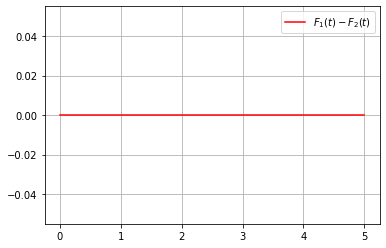

In [19]:
#check that same forces are calculated by this method
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True) #if you want to strictly set the bounds
ax.grid() #this allows us to see the grid
ax.plot(t_vals, F_vals-expr_t_vals,'r',label='$F_1(t)-F_2(t)$') #Note: when using latex in legends, use double instead of single '\' for variables
ax.legend() #show the legend

plt.show() #this says display the info here